In [ ]:
#KÜTÜPHANELERİN EKLENMESİ (numpy,pandas,seaborn,matplotlib gibi)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time
from subprocess import check_output
import plotly.graph_objs as go
import plotly.offline as py
#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.

In [ ]:
#VERİ SETİNİN EKLENMESİ
data = pd.read_csv('/content/drive/MyDrive/data.csv')


In [ ]:
#KAYIP DEĞERLER
null_feat = pd.DataFrame(len(data['id']) - data.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, marker=dict(color = 'lightgrey',
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  "Missing Values")

fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [ ]:
# NORMALİZASYON İŞLEMİ
# Select only numeric columns for normalization

# Assuming 'data' from 'ipython-input-8-5b2369f37efb' is the dataset
x_data = data.copy()  # Create a copy of 'data' and assign it to x_data

numeric_cols = x_data.select_dtypes(include=np.number).columns
x = x_data.copy()  # Create a copy to avoid modifying the original DataFrame
x[numeric_cols] = (x_data[numeric_cols] - np.min(x_data[numeric_cols])) / (np.max(x_data[numeric_cols]) - np.min(x_data[numeric_cols]))

In [ ]:
'''# VERİLERİN TRAİN VE TEST OLARAK AYRILMASI
from sklearn.model_selection import train_test_split

# Assuming 'diagnosis' is your target variable column
y = data['diagnosis']  # Define 'y' using the target column from your data

# Now you can use 'x' and 'y' in train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape) '''

x train:  (33, 483)
x test:  (33, 86)
y train:  (483,)
y test:  (86,)


In [ ]:
# %%initialize
# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [ ]:
data.head()  # head method show only first 5 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# quick look to data
data.head()
data.shape # (569, 31)
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
# GEREKSİZ KOLONLARIN ATILMASI
# y includes our labels and x includes our features
y = data.diagnosis                          # M or B
# list = ['Unnamed: 32','id','diagnosis'] # These columns were already dropped
list = ['diagnosis']  # Only drop 'diagnosis' as it's the target variable
x = data.drop(list,axis = 1 )
x.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Number of Benign:  357
Number of Malignant :  212


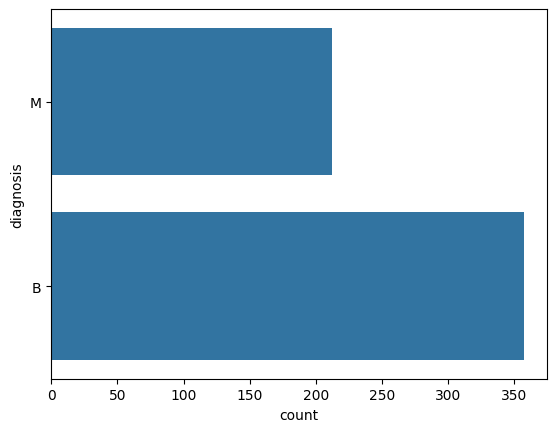

In [ ]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

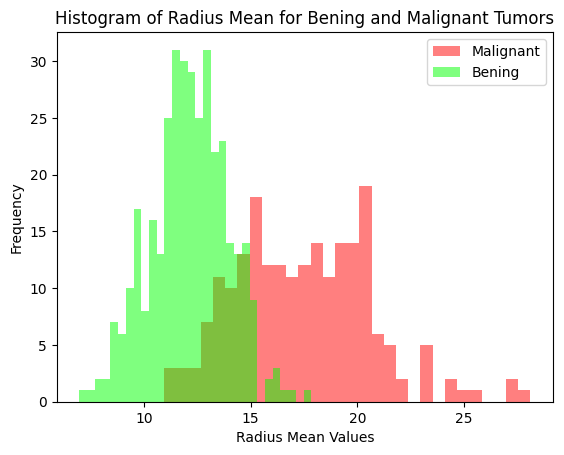

In [ ]:
#Histogram kullanımı
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max()

In [ ]:
#Outliers değerler
data_benign = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
desc = data_benign.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier (for benign): (", lower_bound ,",", upper_bound,")")
data_benign[data_benign.radius_mean < lower_bound].radius_mean
print("Outliers(for benign): ",data_benign[(data_benign.radius_mean < lower_bound) | (data_benign.radius_mean > upper_bound)].radius_mean.values)

desc = data_malignant.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier(for malignant): (", lower_bound ,",", upper_bound,")")
data_malignant[data_malignant.radius_mean < lower_bound].radius_mean
print("Outliers(for malignant): ",data_malignant[(data_malignant.radius_mean < lower_bound) | (data_malignant.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier (for benign): ( 7.645000000000001 , 16.805 )
Outliers(for benign):  [ 6.981 16.84  17.85 ]
Anything outside this range is an outlier(for malignant): ( 8.302499999999998 , 26.3625 )
Outliers(for malignant):  [27.22 28.11 27.42]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'id'),
  Text(1, 0, 'radius_mean'),
  Text(2, 0, 'texture_mean'),
  Text(3, 0, 'perimeter_mean'),
  Text(4, 0, 'area_mean'),
  Text(5, 0, 'smoothness_mean'),
  Text(6, 0, 'compactness_mean'),
  Text(7, 0, 'concavity_mean'),
  Text(8, 0, 'concave points_mean'),
  Text(9, 0, 'symmetry_mean')])

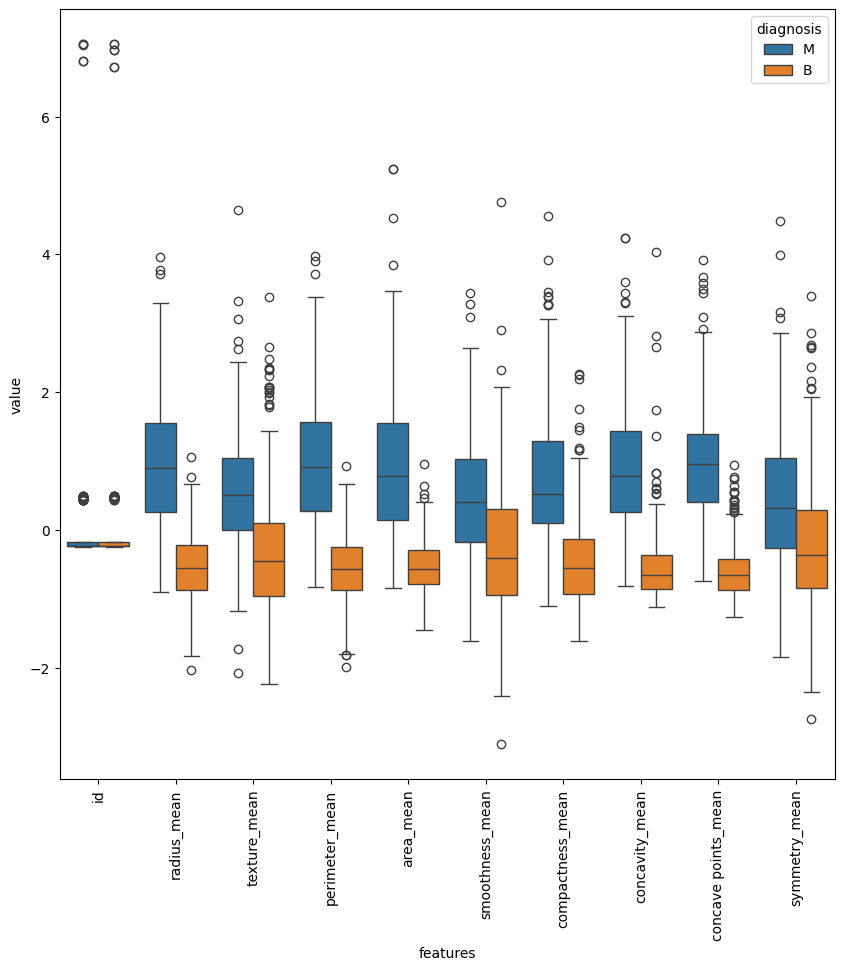

In [ ]:
#Boxplot kullanımı
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())

# standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'id'),
  Text(1, 0, 'radius_mean'),
  Text(2, 0, 'texture_mean'),
  Text(3, 0, 'perimeter_mean'),
  Text(4, 0, 'area_mean'),
  Text(5, 0, 'smoothness_mean'),
  Text(6, 0, 'compactness_mean'),
  Text(7, 0, 'concavity_mean'),
  Text(8, 0, 'concave points_mean'),
  Text(9, 0, 'symmetry_mean')])

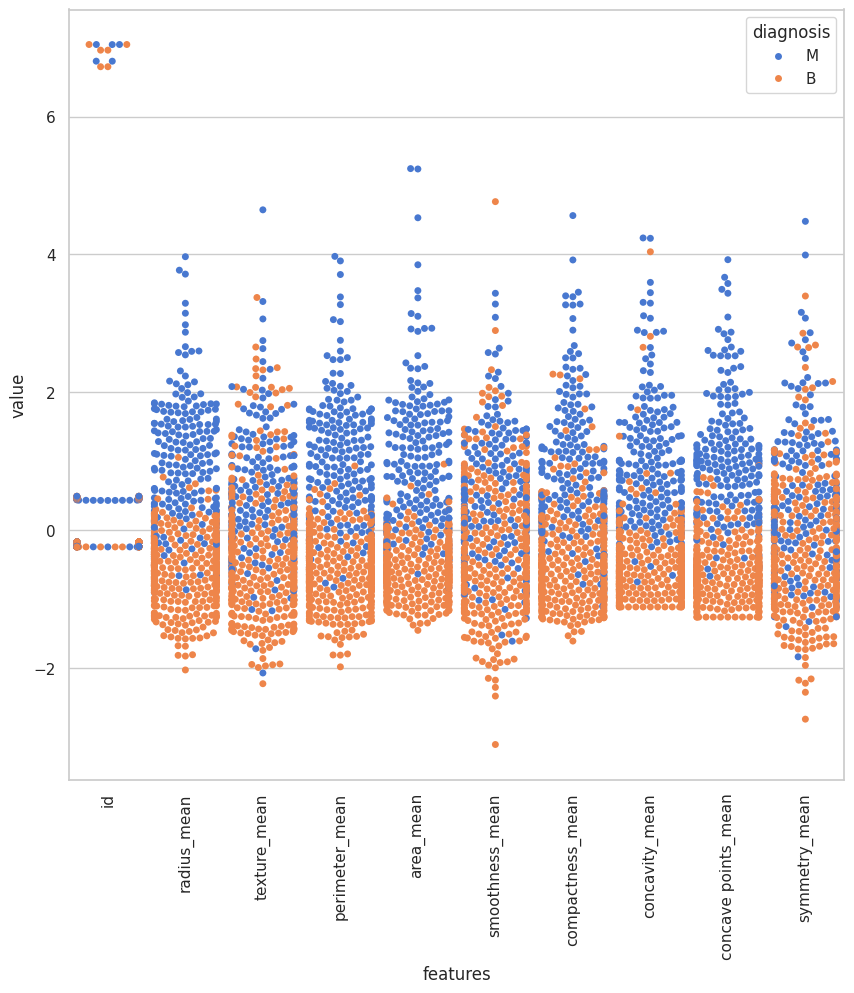

In [ ]:
#swarmplot kullanımı
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

In [ ]:
print("Benign mean: ",data_benign.radius_mean.mean())
print("Benign variance: ",data_benign.radius_mean.var())
print("Benign standart deviation (std): ",data_benign.radius_mean.std())
print("Benign describe method: ",data_benign.radius_mean.describe())

print("\nMalignant mean: ",data_malignant.radius_mean.mean())
print("Malignant variance: ",data_malignant.radius_mean.var())
print("Malignant standart deviation (std): ",data_malignant.radius_mean.std())
print("Malignant describe method: ",data_malignant.radius_mean.describe())

Benign mean:  12.146523809523808
Benign variance:  3.170221722043872
Benign standart deviation (std):  1.7805116461410389
Benign describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64

Malignant mean:  17.462830188679245
Malignant variance:  10.265430814629346
Malignant standart deviation (std):  3.2039711007793663
Malignant describe method:  count    212.000000
mean      17.462830
std        3.203971
min       10.950000
25%       15.075000
50%       17.325000
75%       19.590000
max       28.110000
Name: radius_mean, dtype: float64


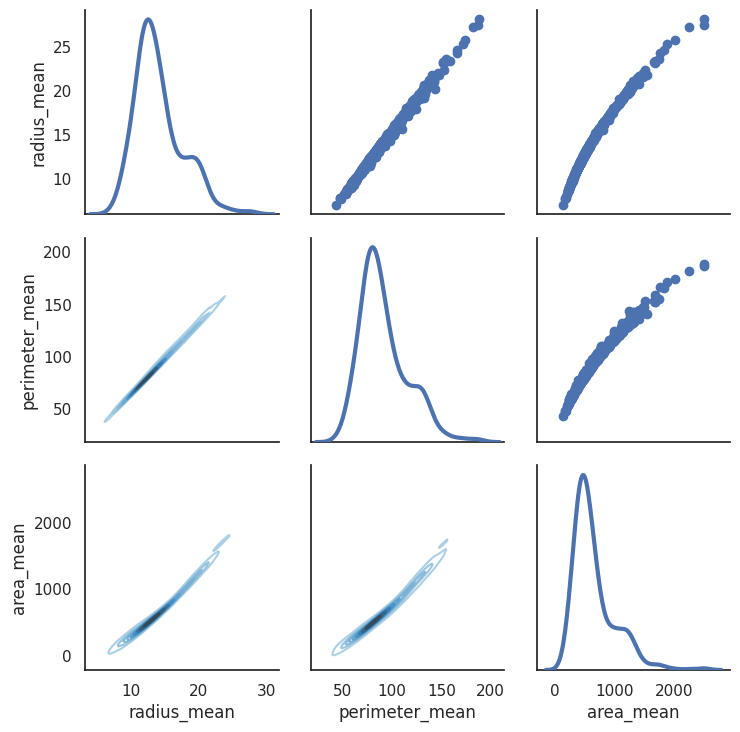

In [ ]:
#Scatter kullanımı

sns.set(style="white")
df = x.loc[:,['radius_mean','perimeter_mean','area_mean']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

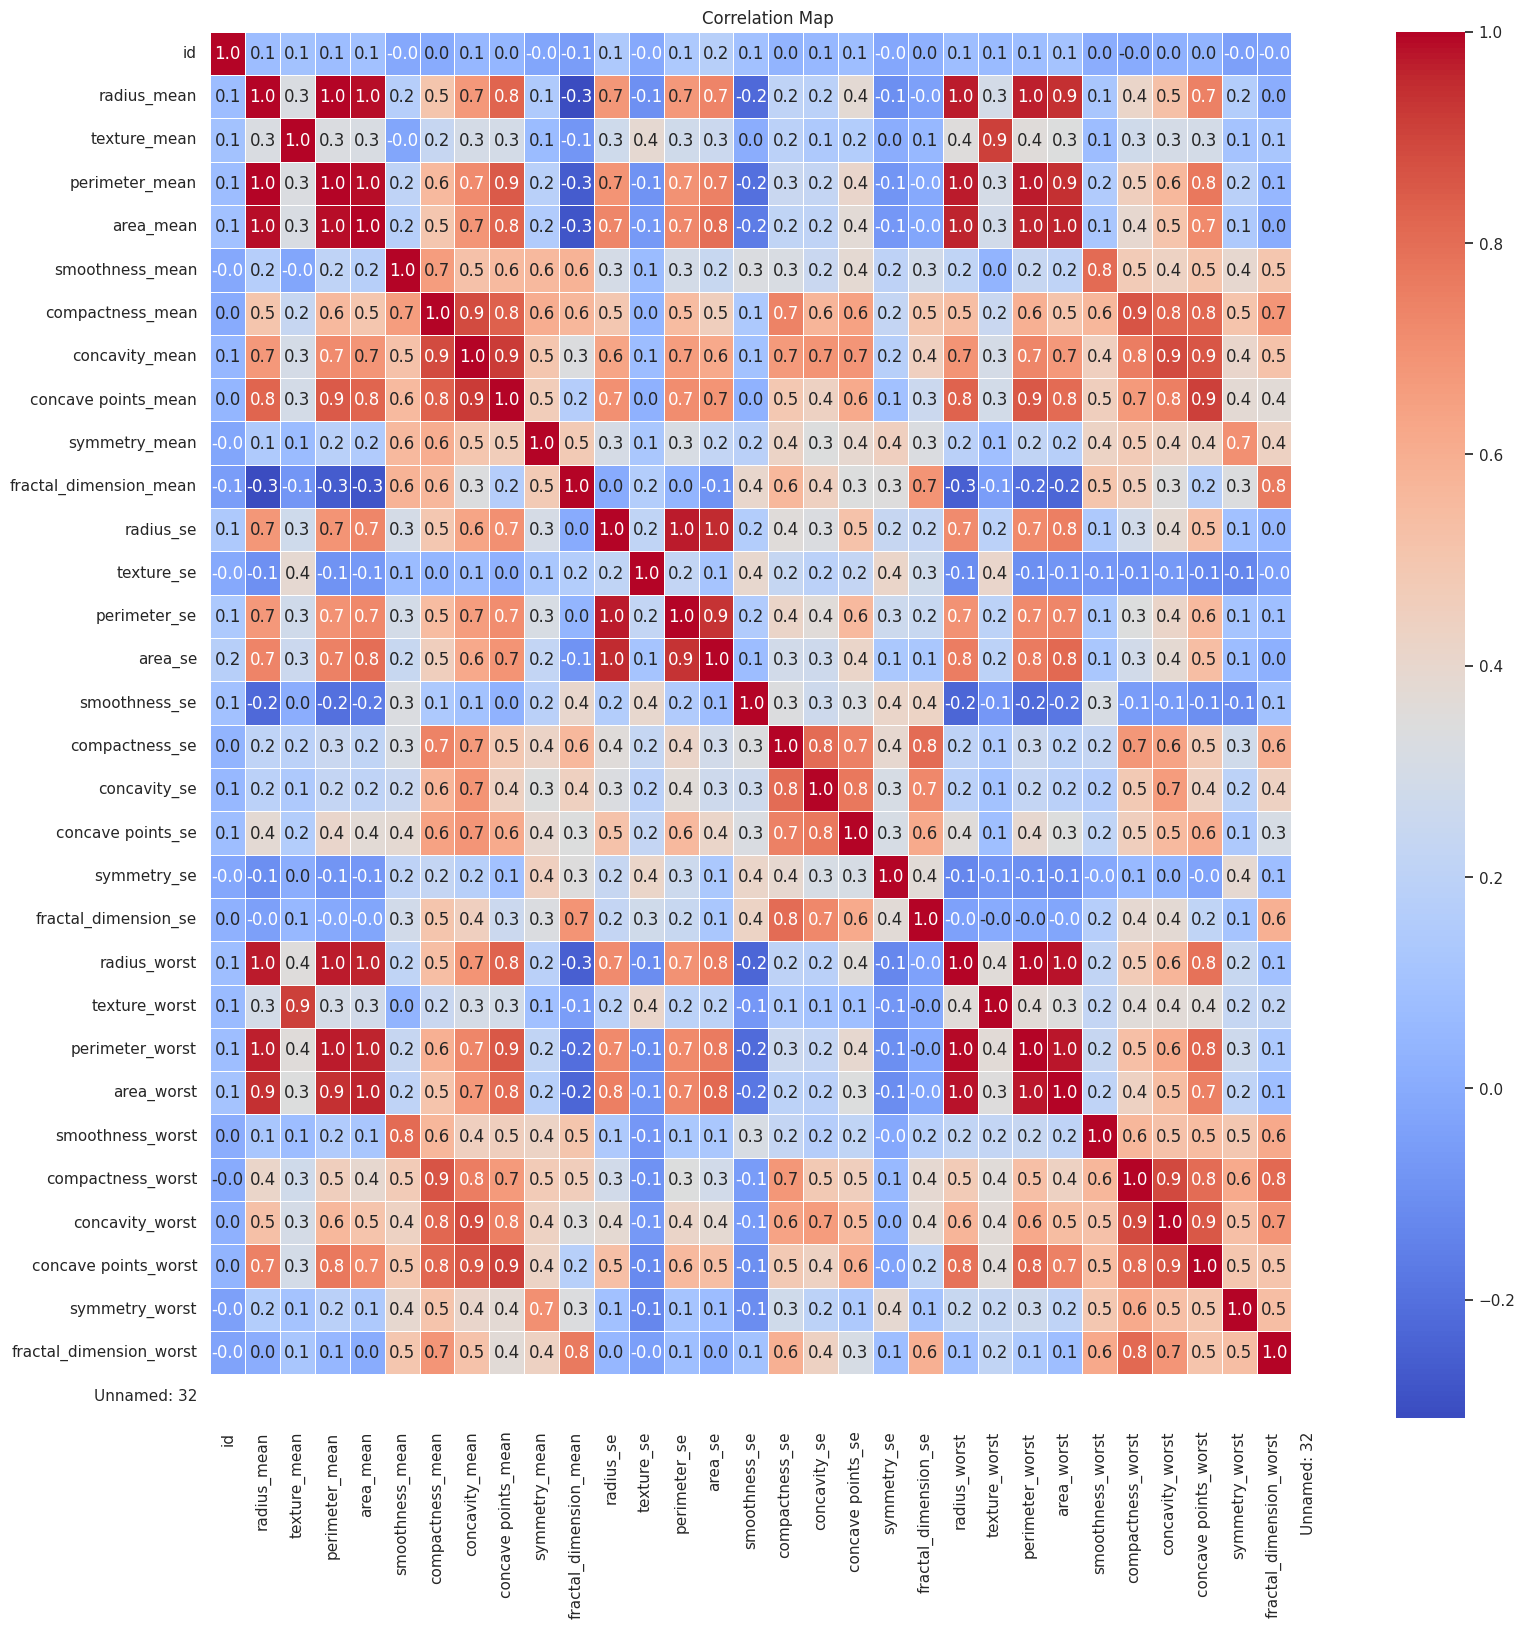

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

f,ax=plt.subplots(figsize = (18,18))

# 'diagnosis' sütununu hariç tutarak yalnızca sayısal sütunları seçtik
numerical_data = x  # x, sayısal özellikler içeren DataFrame'iniz olmalı

# Korelasyon matrisini hesapladık
corr_matrix = numerical_data.corr()

# Isı haritasını oluşturduk
sns.heatmap(corr_matrix, annot= True, linewidths=0.5, fmt = ".1f", ax=ax, cmap='coolwarm')

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

mean:  109.99904559215167
standart deviation:  20.034391032896647


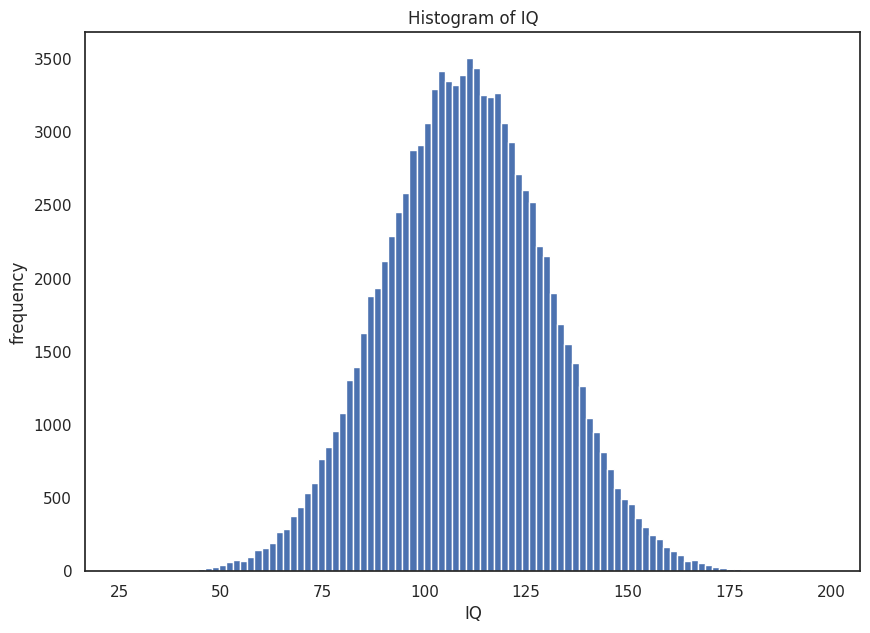

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# parameters of normal distribution
mu, sigma = 110, 20  # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
print("mean: ", np.mean(s))
print("standart deviation: ", np.std(s))
# visualize with histogram
plt.figure(figsize = (10,7))
# Replace 'normed=False' with 'density=False' or remove it for default behavior
# If you want a normalized histogram, use 'density=True'
plt.hist(s, 100, density=False)
plt.ylabel("frequency")
plt.xlabel("IQ")
plt.title("Histogram of IQ")
plt.show()

In [ ]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 'id' gibi sayısal olmayan sütunları düşürün
X = X.select_dtypes(include=np.number)

scaler = MinMaxScaler() # max value = 1 , min value = 0
X = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np


# Start with your original DataFrame 'data'
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Select numerical features from the DataFrame 'X'
X = X.select_dtypes(include=np.number)

# Split data before scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=42)

# Now scale X_train and X_test separately
scaler = MinMaxScaler() # max value = 1 , min value = 0
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # Use transform, not fit_transform, for X_test

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train) # Fit and transform on y_train
y_test = encoder.transform(y_test) # Only transform on y_test


# Define the model with the correct input shape
model1 = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)), # input_shape should match X_train's shape
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

history = model1.fit(X_train, y_train, epochs=150, validation_split=0.5)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6356 - loss: 0.6874 - val_accuracy: 0.6240 - val_loss: 0.6764
Epoch 2/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6219 - loss: 0.6737 - val_accuracy: 0.6240 - val_loss: 0.6657
Epoch 3/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6223 - loss: 0.6643 - val_accuracy: 0.6240 - val_loss: 0.6584
Epoch 4/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6274 - loss: 0.6553 - val_accuracy: 0.6240 - val_loss: 0.6503
Epoch 5/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6083 - loss: 0.6546 - val_accuracy: 0.6240 - val_loss: 0.6403
Epoch 6/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6232 - loss: 0.6377 - val_accuracy: 0.6279 - val_loss: 0.6266
Epoch 7/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6340 - loss: 0.6247 - val_accuracy: 0.6490 - val_loss: 0.6105
Epoch 8/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6670 - loss: 0.6026 - val_accuracy: 0.6915 - v

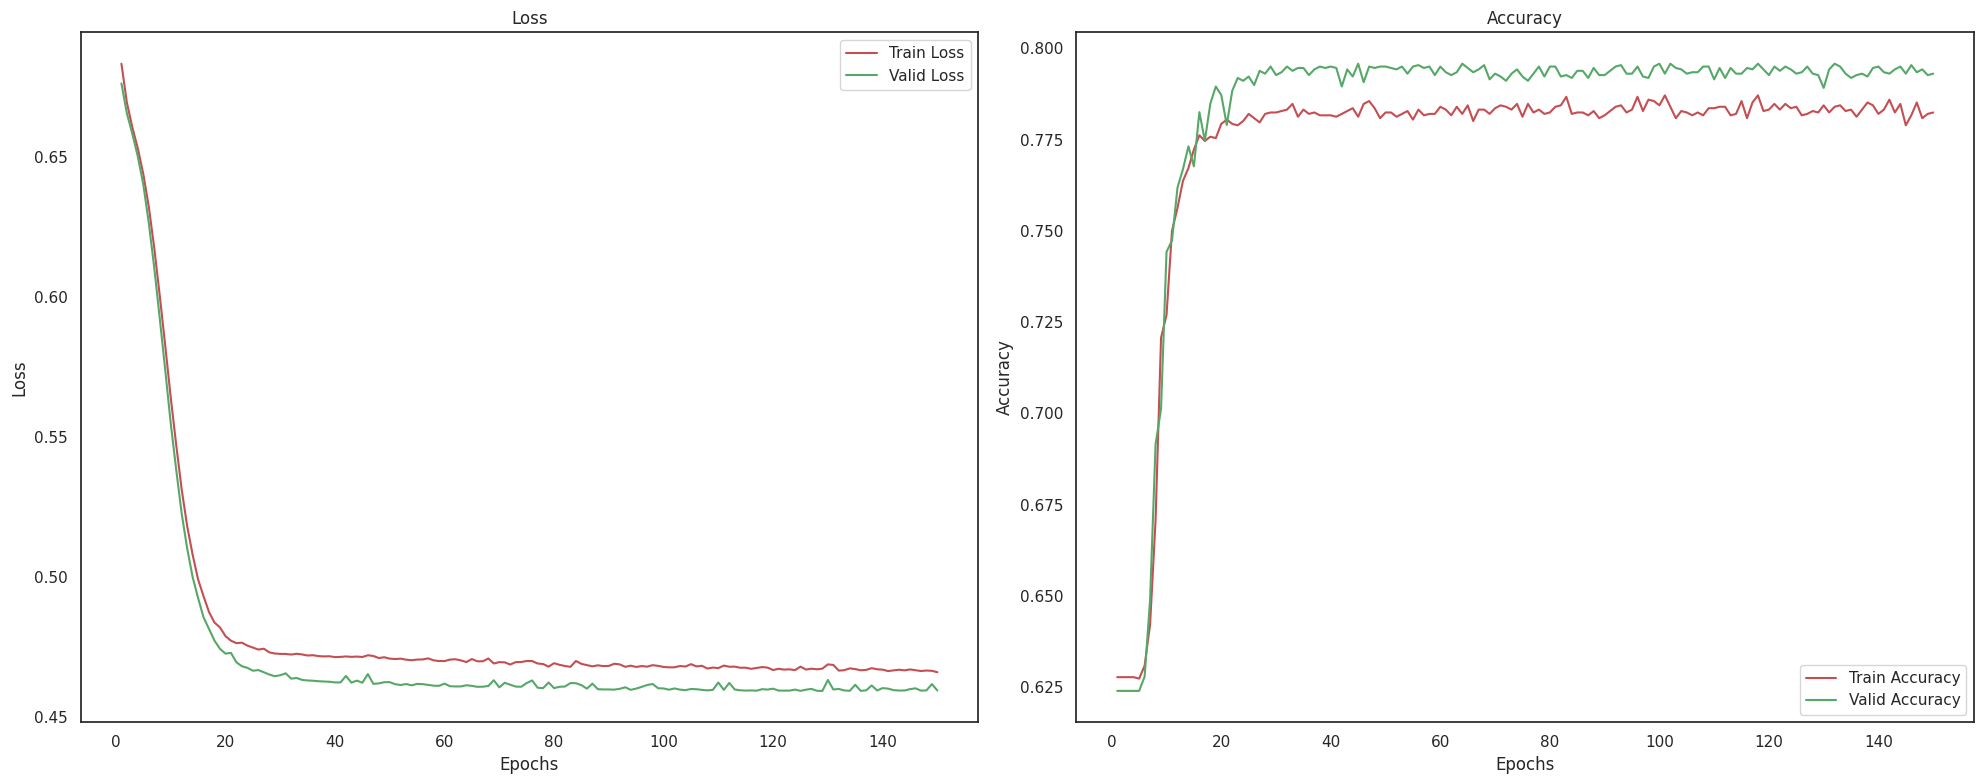

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
y_pred = model1.predict(X_test)
y_pred = (y_pred > 0.5)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[316,  49],
       [ 70, 134]])

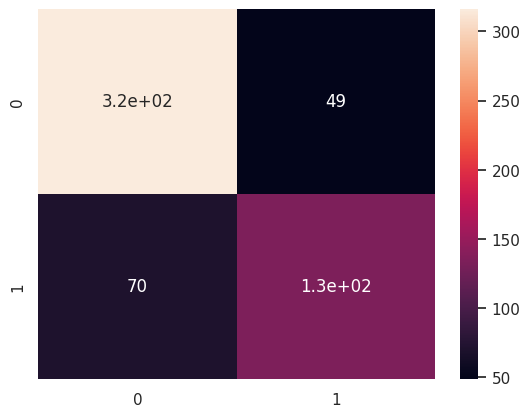

In [ ]:
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
model1.save('model.h5')